# Loops & Orbits &mdash; Week 3 &mdash; Day 2

## Modeling Economic Growth

## *Notebook by Prof. Andr&aacute;s Margitay-Becht*

We have been presented with an economic model. Let's review the terms and units used to quantify the model.

### Terms

An economy has a certain amount of:

* GDP, Y &mdash; which in an advanced economy is a function of how much capital is in operation
* capital, K &mdash; you can remember what that stands for because Karl Marx spelled Das Kapital with a K &mdash; this is the amount of machinery for production, such as silicon wafer fabrication lines or lithium ion battery factories
* investment in additional capital, I &mdash; known as savings
* depreciation of capital, D, &mdash; depreciation is due to aging or obsolescing of the capital stock
* time, T &mdash; captial T is the same as the lower-case t we have been using in our physics models

(GDP stands for Gross Domestic Product and is the rate of production of goods and services.)

### Units

If we were applying this to something like the State of California, to make the ideas more concrete you can imagine that the units are:

* Y, millions of USD / year
* K, millions of USD
* I, millions of USD / year
* D, millions of USD / year
* T, years

(USD is the currency code for United States Dollars. Example currency codes you might run into in economics texts are CAD for Canadian dollar, EUR for Euro, JPY for Japanese Yen, or RMB for Chinese Renminbi.)

Whatever units you are using, K is an amount, and Y, I, and D are amounts per time.

### Visualizations

#### 1. Dependency on K

We want to visualize how Y, I, and D depend on K in this model. *The graphs in that visualization will not depend on time.* They will depend on K.

#### 2. Dependency on T

We want to start an economy out at a certain size and be able to see (for example over the next 100 years), how that economy will grow. The most important measure of growth is Y, but we might want to visualize the annual percentage change in Y, or we might want to visualize how much capital, K, the economy has.

**In the next cell just execute the imports.** There is nothing in this cell for you to work on.

In [30]:
# Use the numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each economic function:
import unittest

## Constants For the Model

The following constants go into the model equations.

**Just execute the assignments.** There is nothing in this cell for you to work on *except to notice what constants are going to go into the model.*

In [ ]:
# Define the starting size of the economy
capital = 1000.0 # so this economy starts with 1 billion in capital if the units are millions of USD

# Define the factors controlling the rates of change
production_rate = 5.0  # lower-case p in the equations on the board
depreciation_rate = 0.01 # lower-case delta (nothing to do with delta_t!) in the equations on the board
savings_rate = 0.25 # lower-case s in the equations on the board

# Define simulation time -- we are going to do 100 steps of 1 year each -- total 100 years
simulation_time_steps = 100 
delta_t = 1.0 # time step in years

## The Model Functions

Remind us to put the model functions on the board if they are not already.

This first function involves a square root. Use `np.sqrt()` not the `sqrt()` function from the math library. The reason is the same as the reason we used `np.exp()` in the battery-charging notebook: the numpy versions of the math functions can take an entire ndarray as an argument; the math library versions can only take a single float as an argument.

In [1]:
# The production function of the economy
def prodFunct(K):
    output = production_rate * np.sqrt(K)
    return output

# Loss of capital
def depreciation(K):
    delta = K*depreciation_rate
    return delta

# Savings invested in new capital
def investment(Y):
    I = Y*savings_rate
    return I

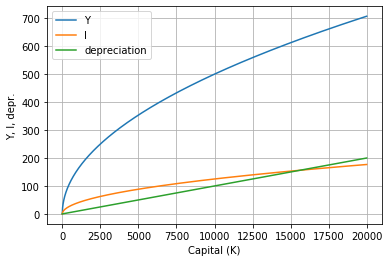

In [32]:
#plotting the change diagram
#Function of K!
Ks_to_plot = np.arange(0, 20000, 10)

Ys_to_plot = prodFunct(Ks_to_plot)
Is_to_plot = investment(Ys_to_plot)
depr_to_plot = depreciation(Ks_to_plot)


plt.plot(Ks_to_plot, Ys_to_plot)
plt.plot(Ks_to_plot, Is_to_plot)
plt.plot(Ks_to_plot, depr_to_plot)


plt.xlabel("Capital (K)")
plt.ylabel("Y, I, depr.")
plt.legend(("Y", "I", "depreciation"))
plt.grid()
plt.show()

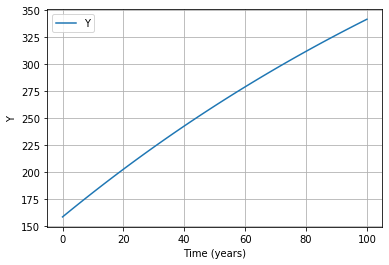

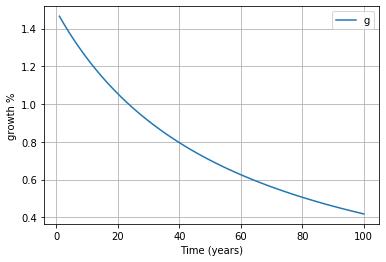

In [33]:
# Time trajectory of growth
sim_Y = np.zeros((simulation_time_steps + 1,))
sim_time = np.zeros((simulation_time_steps + 1,))
sim_K = np.zeros((simulation_time_steps + 1,))
sim_growth = np.zeros((simulation_time_steps + 1,))
sim_K[0] = capital
sim_Y[0] = prodFunct(capital)

for i in range(1, simulation_time_steps + 1):
    sim_K[i] = sim_K[i-1] + investment(sim_Y[i-1]) - depreciation(sim_K[i-1])
    sim_Y[i] = prodFunct(sim_K[i])
    sim_growth[i] = (sim_Y[i]-sim_Y[i-1])/sim_Y[i-1]
    sim_time[i] = sim_time[i-1]+delta_t
    
# Plot GDP by time
plt.plot(sim_time, sim_Y)
plt.xlabel("Time (years)")
plt.ylabel("Y")
plt.legend(("Y"))
plt.grid()
plt.show()

# Plot growth rate by time
sim_time = np.delete(sim_time,0)
sim_growth = np.delete(sim_growth,0)
plt.plot(sim_time, sim_growth*100)
plt.xlabel("Time (years)")
plt.ylabel("growth %")
plt.legend(("growth"))
plt.grid()
plt.show()
